<a href="https://colab.research.google.com/github/xb24/Deep-Network-Models/blob/main/CNN_representation%20similarity%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/brain-score/brain-score

  Cloning https://github.com/brain-score/brain-score to /tmp/pip-req-build-h3vnirn8
  Running command git clone -q https://github.com/brain-score/brain-score /tmp/pip-req-build-h3vnirn8
  Cloning https://github.com/brain-score/brainio to /tmp/pip-install-2qbaqr57/brainio_914cdc9e9d12489cb1d56c410b34a291
  Running command git clone -q https://github.com/brain-score/brainio /tmp/pip-install-2qbaqr57/brainio_914cdc9e9d12489cb1d56c410b34a291
  Cloning https://github.com/brain-score/result_caching to /tmp/pip-install-2qbaqr57/result-caching_9f4e7e8c9617477996255488490fea6b
  Running command git clone -q https://github.com/brain-score/result_caching /tmp/pip-install-2qbaqr57/result-caching_9f4e7e8c9617477996255488490fea6b
     |████████████████████████████████| 6.8 MB 4.1 MB/s 
     |████████████████████████████████| 181 kB 72.5 MB/s 
     |████████████████████████████████| 87 kB 8.8 MB/s 
     |████████████████████████████████| 561 kB 68.2 MB/s 
     |████████████████████████████████| 855 k

# 1. Load and explore the data

### a) Load in the neural data and plot the activity of a specific neuron over the image set after sorting the images according to object category.

In [ ]:
!wget -O bme590.7_monkey_data_IT.pickle "https://www.dropbox.com/s/ffj9n6hulrr9o5e/bme590.7_monkey_data_IT.pickle?dl=0"
!wget -O bme590.7_monkey_data_V4.pickle "https://www.dropbox.com/s/ef2p2yxxw3au4ai/bme590.7_monkey_data_V4.pickle?dl=0"


--2022-04-02 18:49:10--  https://www.dropbox.com/s/ffj9n6hulrr9o5e/bme590.7_monkey_data_IT.pickle?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ffj9n6hulrr9o5e/bme590.7_monkey_data_IT.pickle [following]
--2022-04-02 18:49:10--  https://www.dropbox.com/s/raw/ffj9n6hulrr9o5e/bme590.7_monkey_data_IT.pickle
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc20ce5d06f3496a35867a9d63f6.dl.dropboxusercontent.com/cd/0/inline/BipLJWG5xHa5paYWuDYNh8qUPRIXxLcbs-m2AV9GPOWYk2tRFFiFi963OPGkiL-AHILKQkNhpOSlqcShZQhe6P8zTKg5E_O1V4sW5tZJ1NLRdRg7bI-aLddgWYtmThEu0dihZ20WaCXY1p6AnKH4B-_DEdludDWe6tHkVL8trHaeaw/file# [following]
--2022-04-02 18:49:11--  https://uc20ce5d06f3496a35867a9d63f6.dl.dropboxusercontent.com/cd/0/inline/BipLJWG5

In [ ]:
!wget -O stimuli.zip "https://www.dropbox.com/s/1tqaszd41ref40v/stimuli.zip?dl=0"
!unzip stimuli.zip

--2022-04-02 18:50:01--  https://www.dropbox.com/s/1tqaszd41ref40v/stimuli.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/1tqaszd41ref40v/stimuli.zip [following]
--2022-04-02 18:50:02--  https://www.dropbox.com/s/raw/1tqaszd41ref40v/stimuli.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfc1e0f3fb7a3c6a761a98fa567.dl.dropboxusercontent.com/cd/0/inline/BiotkDY63ycEPRzjaGA9InESpG0yN68UXHccY6aTMIPrfuc6CggAOgeQE0as3BLXF3ptXQ3i90AggliDCjnRUQaMtke0HX3RuiT2hyyXHOqEeX1XG4sNtBVC1rcT5ODXTNTFBN3K-QjrcV9oe3fKlQCzpQC5AHuEzL3nIFAw4Z9s8Q/file# [following]
--2022-04-02 18:50:03--  https://ucfc1e0f3fb7a3c6a761a98fa567.dl.dropboxusercontent.com/cd/0/inline/BiotkDY63ycEPRzjaGA9InESpG0yN68UXHccY6aTMIPrfuc6CggAOgeQE0as3BLXF

In [ ]:
import pickle
with open('./bme590.7_monkey_data_V4.pickle','rb') as f:
 data_v4 = pickle.load(f)
with open('./bme590.7_monkey_data_IT.pickle','rb') as f:
 data_it = pickle.load(f)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
from tqdm import tqdm
import torchvision.models as models
import torch
import torch.nn as nn
from torchvision import transforms, datasets
import imageio

In [ ]:
# data_v4

In [ ]:
# data_it

In [ ]:
def activity_plot(data, neuron):
  new_data = []
  # fig, axs = plt.subplots(8, figsize=(10, 30), sharex=False, sharey=True)
  fig, axs = plt.subplots(1,8, figsize=(40, 3), sharex=False, sharey=True)
  i = 0;
  for category in tqdm(np.unique(data['category_name'])):
    idx = np.where(data.neuroid_id==neuron)[0]
    axs[i].plot(data[data['category_name']==category][:,idx])
    new_data.append(data[data['category_name']==category][:,idx])
    axs[i].set_title(category)
    # axs[i].set_ylim([0, 2])
    i = i+1

100%|██████████| 8/8 [00:00<00:00, 112.72it/s]


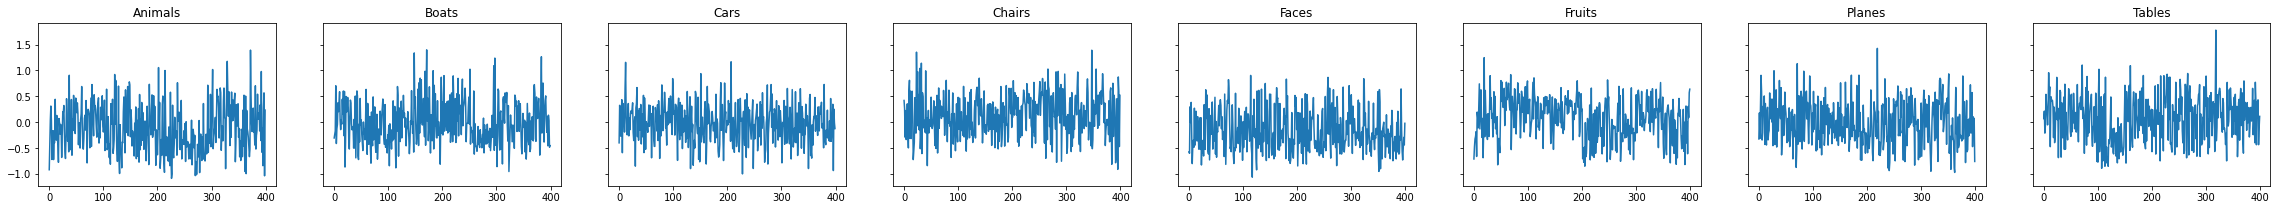

In [ ]:
activity_plot(data_v4, 'Chabo_L_P_2_9')

100%|██████████| 8/8 [00:00<00:00, 105.47it/s]


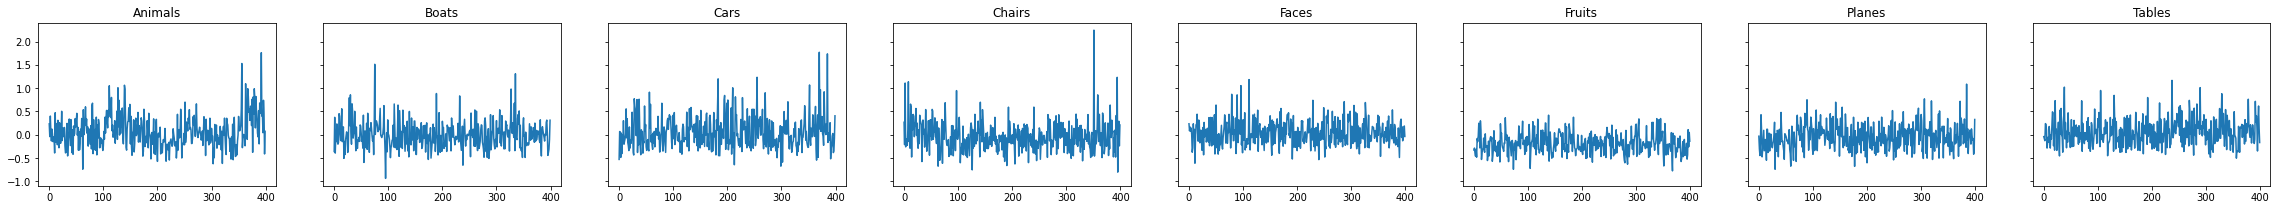

In [ ]:
activity_plot(data_it, 'Chabo_L_M_5_9')

### b) Find an IT neuron that responds most strongly to Face images (averaged over all face images) and plot its activity over all stimuli using the plotting function you've written.

In [ ]:
np.unique(data_it['category_name'])

array(['Animals', 'Boats', 'Cars', 'Chairs', 'Faces', 'Fruits', 'Planes',
       'Tables'], dtype=object)

In [ ]:
def strongest_neuron(data, category):
  stro_neuron_idx = np.argmax(np.mean(np.array(data[data['category_name']==category]), axis=0))
  stro_neuron_name = np.array(data['neuroid_id'])[stro_neuron_idx]
  activity_plot(data, stro_neuron_name)
  return stro_neuron_idx, stro_neuron_name

100%|██████████| 8/8 [00:00<00:00, 99.55it/s]


(56, 'Chabo_L_M_9_1')

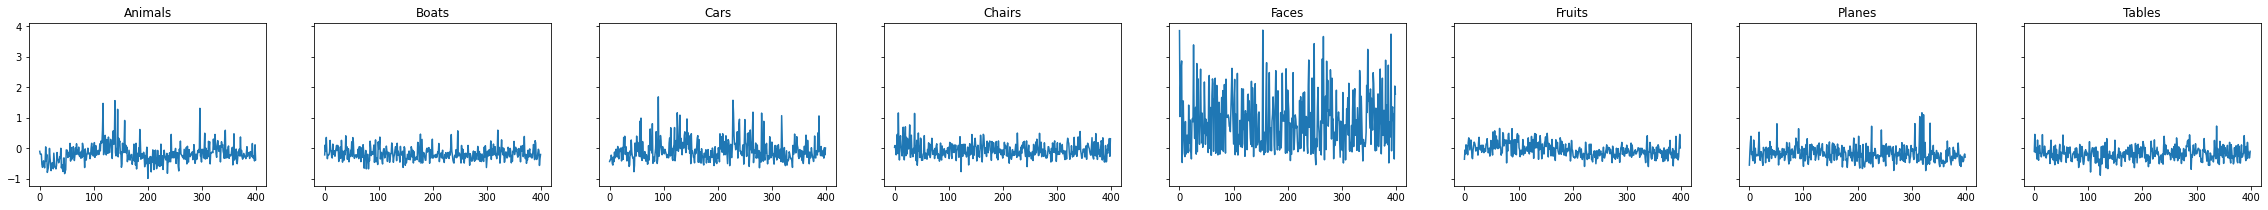

In [ ]:
strongest_neuron(data_it,'Faces')

### c) Do the same, but for responses to Animal images

100%|██████████| 8/8 [00:00<00:00, 113.41it/s]


(16, 'Chabo_L_A_9_7')

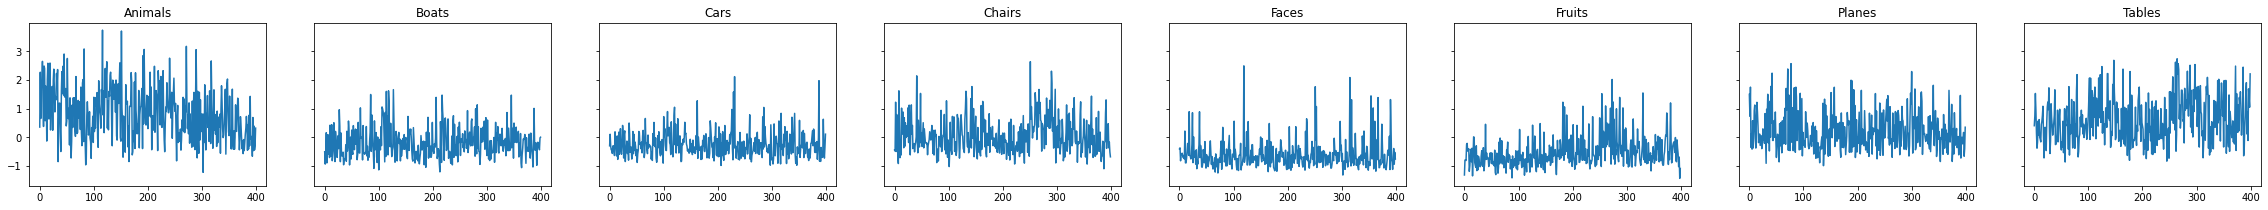

In [ ]:
strongest_neuron(data_it,'Animals')

### d) Find the V4 neurons that respond most strongly to (a) Face images and (b) Animal images, and plot their responses

100%|██████████| 8/8 [00:00<00:00, 109.48it/s]


(11, 'Chabo_L_P_9_8')

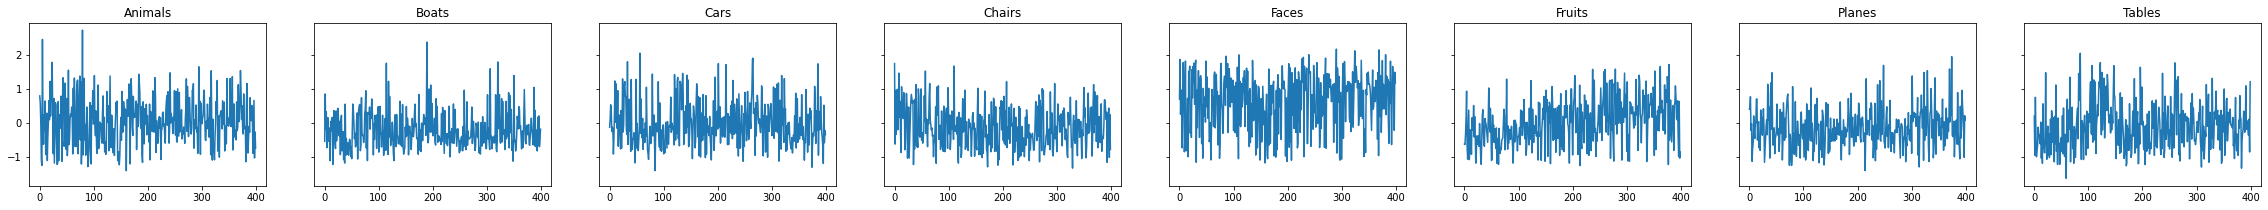

In [ ]:
strongest_neuron(data_v4,'Faces')

100%|██████████| 8/8 [00:00<00:00, 114.21it/s]


(65, 'Chabo_L_P_6_0')

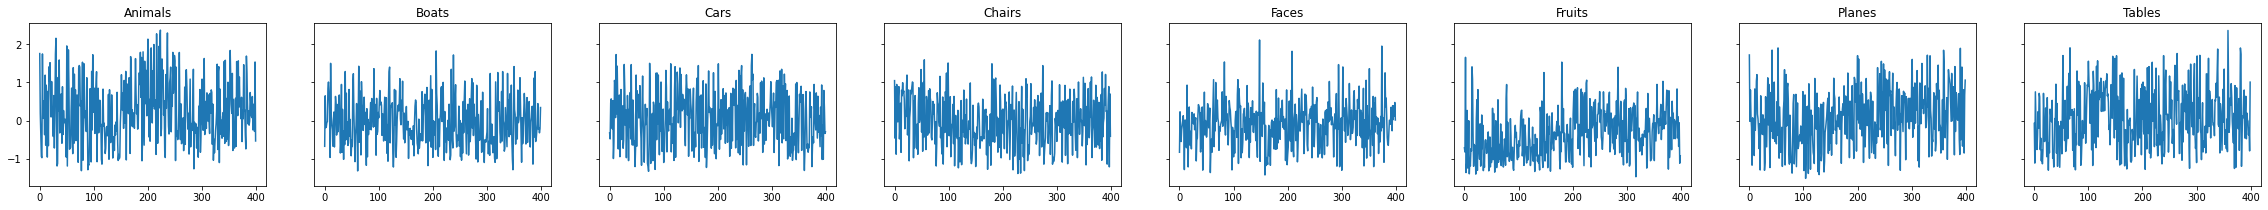

In [ ]:
strongest_neuron(data_v4,'Animals')

### e) Discuss any differences that you see between IT and V4 neurons. Do they reflect what you've learned thus far about the ventral stream? Plot some of the Face and Animal images to aid your discussion.

Both V4 and IT neurons play a key role in object recognition. However, based on the reults from Part 1 above, it seems that IT neurons underlie higher level object recognition.

Sepcifically, IT neurons are highly selective for facial images, while V4 neurons are not. In general, IT neurons are more selective for complex images than V4 neurons.

Such finding is consistent with the underlying physiology in that IT neurons are usually selective for the shape or color of the stimulus or both parameters and almost all respond more to complex than simple shapes. A small percentage of IT units are selective for facial images. Some are sensitive to emotional expression and some to direction of eye gaze, which are related to facial images. On the other hand, V4 neurons are sensitive to a variety of stimulus attributes related to shape, including the orientation and frequency of Cartesian and non-Cartesian gratings and moderately complex shape features.

# 2. Predict IT and V4 responses from CNN neuron activations

### a) Instantiate a VGG19 CNN with pretrained ImageNet weights and extract the activations from the output of the final max pooling layer in response to each image in the dataset. Remember that each activation corresponds to the firing rate of an artificial neuron.

In [ ]:
vgg19 = models.vgg19(pretrained=True)
# vgg19

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

In [ ]:
vgg19_copy = vgg19.features
# vgg19_copy = nn.Sequential(*list(vgg19.children())[:1])
vgg19_copy

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = vgg19_copy
model = model.to(device)

In [ ]:
data_transforms = transforms.Compose([
        transforms.ToTensor(),
        transforms.CenterCrop(224),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
def activation(mod):
  activ = []
  for param in mod.parameters():
    param.requires_grad = False

  with torch.no_grad():
    for image_name in tqdm(np.array(data_it['image_file_name'])):
      img = imageio.imread('/content/' + image_name)
      input = data_transforms(img).unsqueeze(0).to(device)
      output = mod(input).detach().cpu().numpy()
      activ.append(output)

  activ = np.stack(activ)
  activ = np.reshape(activ,(3200,-1))

  return activ

In [ ]:
act = activation(model)

100%|██████████| 3200/3200 [00:35<00:00, 89.77it/s]


In [ ]:
act.shape

(3200, 25088)

### b) Fit a linear regression model with 10-fold cross-validation to predict the activity of each IT macaque neuron from the population of articial VGG19 neurons. Rather than using the activity of each VGG19 neuron as a feature in the regression, first use PCA to reduce the data to 1000 features. This will make the regression more stable. Feel free to use sklearn functions.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict

In [ ]:
pca = PCA(n_components=1000)
VGG_features = pca.fit(act).transform(act)

In [ ]:
# X = VGG_features
# y = data_it
reg = LinearRegression()

In [ ]:
y_pred_it = cross_val_predict(reg, VGG_features, data_it, cv=10)

### c) Quantify CNN-IT predictivty by calculating the mean (across all images) Pearson correlation coefficient between real IT neuron and predicted IT neurons.

In [ ]:
from numpy import std, cov
from scipy.stats import pearsonr

In [ ]:
pcc_it = []
for i in range(data_it.shape[0]):
  corr,_ = pearsonr(data_it[i,:], y_pred_it[i,:])
  pcc_it.append(corr)

In [ ]:
np.mean(pcc_it)

0.6923163606661131

### d) Run the same analysis using macaque V4 neurons.

In [ ]:
y_pred_v4 = cross_val_predict(reg, VGG_features, data_v4, cv=10)

In [ ]:
pcc_v4 = []
for i in range(data_v4.shape[0]):
  corr,_ = pearsonr(data_v4[i,:], y_pred_v4[i,:])
  pcc_v4.append(corr)

In [ ]:
np.mean(pcc_v4)

0.3416371512030477

### e) Plot the predicted responses to each image on top of the real responses of the neurons you plotted in Part 1.

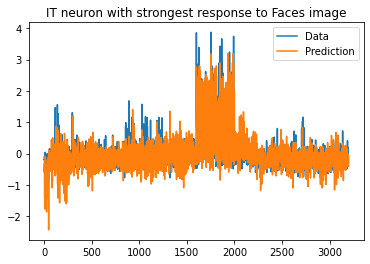

In [ ]:
plt.plot(data_it[:,data_it.neuroid_id=='Chabo_L_M_9_1'], label='Data')
plt.plot(y_pred_it[:,data_it.neuroid_id=='Chabo_L_M_9_1'], label='Prediction')
plt.title('IT neuron with strongest response to Faces image')
plt.legend()

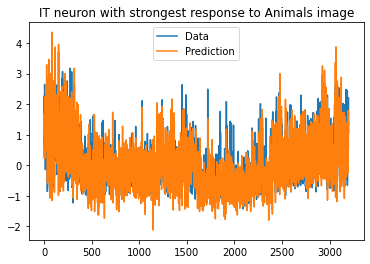

In [ ]:
plt.plot(data_it[:,data_it.neuroid_id=='Chabo_L_A_9_7'], label='Data')
plt.plot(y_pred_it[:,data_it.neuroid_id=='Chabo_L_A_9_7'], label='Prediction')
plt.title('IT neuron with strongest response to Animals image')
plt.legend()

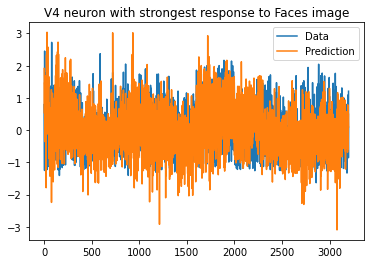

In [ ]:
plt.plot(data_v4[:,data_v4.neuroid_id=='Chabo_L_P_9_8'], label='Data')
plt.plot(y_pred_v4[:,data_v4.neuroid_id=='Chabo_L_P_9_8'], label='Prediction')
plt.title('V4 neuron with strongest response to Faces image')
plt.legend()

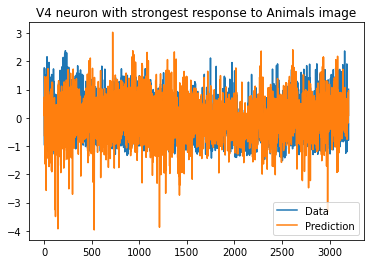

In [ ]:
plt.plot(data_v4[:,data_v4.neuroid_id=='Chabo_L_P_6_0'], label='Data')
plt.plot(y_pred_v4[:,data_v4.neuroid_id=='Chabo_L_P_6_0'], label='Prediction')
plt.title('V4 neuron with strongest response to Animals image')
plt.legend()

### f) Use one other type of data visualization to examine your results. What do your results suggest about the relationship between VGG19 and the ventral stream?

In [ ]:
import seaborn as sns
from scipy.spatial import distance_matrix

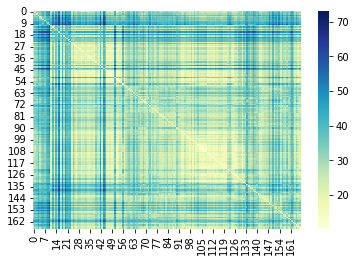

In [ ]:
dis_IT = distance_matrix(np.transpose(np.array(data_it)),np.transpose(np.array(y_pred_it)))
ax = sns.heatmap(dis_IT, cmap="YlGnBu")

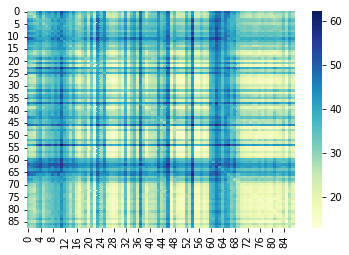

In [ ]:
dis_v4 = distance_matrix(np.transpose(np.array(data_v4)),np.transpose(np.array(y_pred_v4)))
ax = sns.heatmap(dis_v4, cmap="YlGnBu")

Alternatively, heat map of distance matrices could also visualize the comparison between our data sets and prediction results.

My results suggest that VGG19 is good at modeling IT neurons (the diagonal entries are closer to 0), but it is less accurate for V4 neurons (the diag0nal entries are further way from 0).

# 3. (Problem Set 5) Explore population activity relationships using representation similarity analysis (RSA)

### a) Calculate and plot representational dissimilarity matrices for macaque V4 and IT neurons.

In [ ]:
rdm_it = np.corrcoef(data_it)

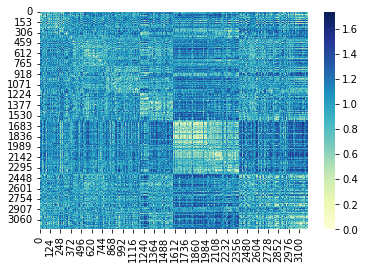

In [ ]:
ax = sns.heatmap(1-rdm_it, cmap="YlGnBu")

In [ ]:
rdm_v4 = np.corrcoef(data_v4)

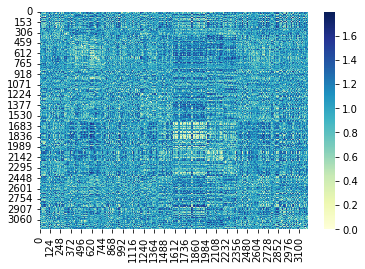

In [ ]:
ax = sns.heatmap(1-rdm_v4, cmap="YlGnBu")

### b) Do the same, but for the VGG19 layer you analyzed above and also the final average pooling layer of ResNet-101 (torchvision.models.resnet101).

In [ ]:
rdm_VGG = np.corrcoef(VGG_features)

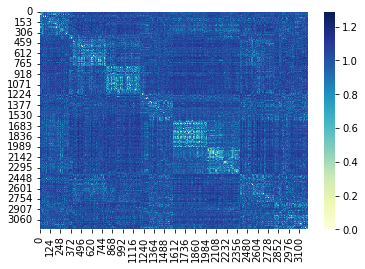

In [ ]:
ax = sns.heatmap(1-rdm_VGG, cmap="YlGnBu")

In [ ]:
ResNet = models.resnet101(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

In [ ]:
ResNet_copy = nn.Sequential(*list(ResNet.children())[:9])
# vgg19_copy = nn.Sequential(*list(vgg19.children())[:1])
ResNet_copy

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [ ]:
model_RS = ResNet_copy
model_RS = model_RS.to(device)
act_RS = activation(model_RS)

100%|██████████| 3200/3200 [01:15<00:00, 42.31it/s]


In [ ]:
act_RS.shape

(3200, 2048)

In [ ]:
ResNet_features = pca.fit(act_RS).transform(act_RS)

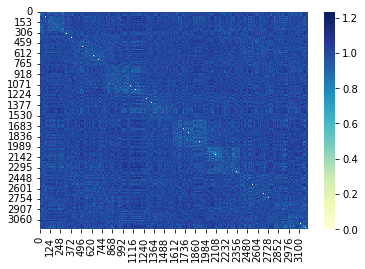

In [ ]:
rdm_ResNet = np.corrcoef(ResNet_features)
ax = sns.heatmap(1-rdm_ResNet, cmap="YlGnBu")

### c) Quantify the difference between the IT matrix and the other matrices using Spearman's correlation coefficient

In [ ]:
from scipy.stats import spearmanr

In [ ]:
it_vs_v4 = spearmanr(np.ravel(rdm_it), np.ravel(rdm_v4))

In [ ]:
it_vs_v4

SpearmanrResult(correlation=0.3067177719866722, pvalue=0.0)

In [ ]:
it_vs_VGG = spearmanr(np.ravel(rdm_it), np.ravel(rdm_VGG))
it_vs_VGG

SpearmanrResult(correlation=0.41395795269799246, pvalue=0.0)

In [ ]:
it_vs_ResNet = spearmanr(np.ravel(rdm_it), np.ravel(rdm_ResNet))
it_vs_ResNet

SpearmanrResult(correlation=0.22852134552601083, pvalue=0.0)

### d) Which of these layers is most IT-like? What does the structure of the IT matrix tell you about how the population responds to different types of visual stimuli?

Based on the Spearman's correlation coefficient, the final maxpooling layer of VGG19 is most IT-like, which is consistent with the result of representational dissimilarity matrices.

Bsed on the structure of the IT matrix, we can see that the population response of IT neurons vary with different object categorization, suggesting that they perform object categorization better than V4 neurons. Along the diagonal line of the IT matrix, we can see 400*400 entries with very low dissimilarity, which line up with the image categories. In addition, IT neurons are especially good at recognizing facial images, but probably not good at telling the difference between a face image and an apple image.